In [ ]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("robinreni/revitsone-5class")


In [ ]:

path

'/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1'

In [ ]:
image_list_other = []
image_list_safe = []
image_list_talking = []
image_list_text = []
image_list_turn = []

for images in os.listdir("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities"):
    if images.endswith(".png") or images.endswith(".jpg"):
        image_list_other.append(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities",
                                             images))
for images in os.listdir("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/safe_driving"):
    if images.endswith(".png") or images.endswith(".jpg"):
        image_list_safe.append(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/safe_driving",
                                             images))
for images in os.listdir("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/talking_phone"):
    if images.endswith(".png") or images.endswith(".jpg"):
        image_list_talking.append(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/talking_phone",
                                             images))
for images in os.listdir("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/texting_phone"):
    if images.endswith(".png") or images.endswith(".jpg"):
        image_list_text.append(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/texting_phone",
                                             images))
for images in os.listdir("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning"):
    if images.endswith(".png") or images.endswith(".jpg"):
        image_list_turn.append(os.path.join("/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning",
                                             images))


In [ ]:
print(len(image_list_other))
print(len(image_list_safe))
print(len(image_list_talking))
print(len(image_list_text))
print(len(image_list_turn))

2128
2203
2169
2203
2063


In [ ]:
image_list_other[0]

'/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_4232.jpg'

In [ ]:
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_79.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_4664.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_7973.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_13318.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_13396.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_13541.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_13625.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_20398.jpg')
image_list_other.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/other_activities/img_22266.jpg')

image_list_turn.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning/img_8771.jpg')
image_list_turn.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning/img_62337.jpg')
image_list_turn.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning/img_67523.jpg')
image_list_turn.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning/img_70552.jpg')
image_list_turn.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning/img_84605.jpg')
image_list_turn.remove('/root/.cache/kagglehub/datasets/robinreni/revitsone-5class/versions/1/Revitsone-5classes/turning/img_101434.jpg')

In [ ]:
plt.figure(1, figsize=(15, 9))
# plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_talking)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who talk with their phone", fontsize=25)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

plt.figure(1, figsize=(15, 9))
# plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_other)
    imgs = imread(random_img)
    plt.suptitle("Random other images of people", fontsize=25)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

plt.figure(1, figsize=(15, 9))
# plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_safe)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who are safe", fontsize=25)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

plt.figure(1, figsize=(15, 9))
# plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_text)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who text with their phone", fontsize=25)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

plt.figure(1, figsize=(15, 9))
# plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_turn)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who are turn", fontsize=25)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

In [ ]:
print(.75*len(image_list_other) , .2*len(image_list_other) ,.05*len(image_list_other))
print(.75*len(image_list_safe) , .2*len(image_list_safe) ,.05*len(image_list_safe))
print(.75*len(image_list_talking) , .2*len(image_list_talking) ,.05*len(image_list_talking))
print(.75*len(image_list_text) , .2*len(image_list_text) ,.05*len(image_list_text))
print(.75*len(image_list_turn) , .2*len(image_list_turn) ,.05*len(image_list_turn))

1589.25 423.8 105.95
1652.25 440.6 110.15
1626.75 433.8 108.45
1652.25 440.6 110.15
1542.75 411.40000000000003 102.85000000000001


In [ ]:
# prompt: divide list into three lists with different sizes and randomly

def split_list(input_list):
    """Splits a list into three sublists with different sizes randomly."""

    list_len = len(input_list)

    # Calculate the sizes of the sublists (75%, 20%, 5%)
    size1 = int(0.75 * list_len)
    size2 = int(0.20 * list_len)
    size3 = list_len - size1 - size2  # Remaining elements

    # Shuffle the list randomly
    random.shuffle(input_list)

    # Split the list into sublists
    sublist1 = input_list[:size1]
    sublist2 = input_list[size1:size1 + size2]
    sublist3 = input_list[size1 + size2:]

    return sublist1, sublist2, sublist3


# Example usage (assuming image_list_other is defined):
train_other, test_other, val_other = split_list(image_list_other)
print(len(train_other), len(test_other), len(val_other))

train_safe, test_safe, val_safe = split_list(image_list_safe)

train_talking, test_talking, val_talking = split_list(image_list_talking)

train_text, test_text, val_text = split_list(image_list_text)

train_turn, test_turn, val_turn = split_list(image_list_turn)
print(len(train_turn), len(test_turn), len(val_turn))





1589 423 107
1542 411 104


In [ ]:
train_other_df = pd.DataFrame({'image':train_other, 'label':'Other'})
train_safe_df = pd.DataFrame({'image':train_safe, 'label':'Safe'})
train_talking_df = pd.DataFrame({'image':train_talking, 'label':'Talk'})
train_text_df = pd.DataFrame({'image':train_text, 'label':'Text'})
train_turn_df = pd.DataFrame({'image':train_turn, 'label':'Turn'})

In [ ]:
test_other_df = pd.DataFrame({'image':test_other, 'label':'Other'})
test_safe_df = pd.DataFrame({'image':test_safe, 'label':'Safe'})
test_talking_df = pd.DataFrame({'image':test_talking, 'label':'Talk'})
test_text_df = pd.DataFrame({'image':test_text, 'label':'Text'})
test_turn_df = pd.DataFrame({'image':test_turn, 'label':'Turn'})

In [ ]:
val_other_df = pd.DataFrame({'image':val_other, 'label':'Other'})
val_safe_df = pd.DataFrame({'image':val_safe, 'label':'Safe'})
val_talking_df = pd.DataFrame({'image':val_talking, 'label':'Talk'})
val_text_df = pd.DataFrame({'image':val_text, 'label':'Text'})
val_turn_df = pd.DataFrame({'image':val_turn, 'label':'Turn'})

In [ ]:
train_df = pd.concat([train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df])
test_df = pd.concat([test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df])
val_df = pd.concat([val_other_df, val_safe_df, val_talking_df, val_text_df, val_turn_df])

In [ ]:
print("Number of rows in train dataframe is: ", len(train_df))
print("Number of rows in test dataframe is: ", len(test_df))
print("Number of rows in val dataframe is: ", len(val_df))

Number of rows in train dataframe is:  8061
Number of rows in test dataframe is:  2147
Number of rows in val dataframe is:  543


In [ ]:
random_img_height = random.choice(train_other)
image= cv2.imread(random_img_height)

height, width= image.shape[:2]

print("The height is ", height)

print("The width is ", width)

The height is  480
The width is  640


In [ ]:
Batch_size = 64
Img_height = 240
Img_width = 240

In [ ]:
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_df

,image,label
0,/root/.cache/kagglehub/datasets/robinreni/revi...,Other
1,/root/.cache/kagglehub/datasets/robinreni/revi...,Other
2,/root/.cache/kagglehub/datasets/robinreni/revi...,Other
3,/root/.cache/kagglehub/datasets/robinreni/revi...,Other
4,/root/.cache/kagglehub/datasets/robinreni/revi...,Other
...,...,...
1537,/root/.cache/kagglehub/datasets/robinreni/revi...,Turn
1538,/root/.cache/kagglehub/datasets/robinreni/revi...,Turn
1539,/root/.cache/kagglehub/datasets/robinreni/revi...,Turn
1540,/root/.cache/kagglehub/datasets/robinreni/revi...,Turn


In [ ]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)
testDataset = trainGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)
valDataset = trainGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)

Found 8061 validated image filenames belonging to 5 classes.
Found 2147 validated image filenames belonging to 5 classes.
Found 543 validated image filenames belonging to 5 classes.


In [ ]:
# prompt: alexnet structure

# def alexnet_model(input_shape, num_classes):
#     model = keras.Sequential(
#         [
#             keras.Input(shape=input_shape),
#             layers.Conv2D(96, kernel_size=(11, 11), strides=4, padding="valid", activation="relu"),
#             layers.MaxPooling2D(pool_size=(3, 3), strides=2),
#             layers.Conv2D(256, kernel_size=(5, 5), padding="same", activation="relu"),
#             layers.MaxPooling2D(pool_size=(3, 3), strides=2),
#             layers.Conv2D(384, kernel_size=(3, 3), padding="same", activation="relu"),
#             layers.Conv2D(384, kernel_size=(3, 3), padding="same", activation="relu"),
#             layers.Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"),
#             layers.MaxPooling2D(pool_size=(3, 3), strides=2),
#             layers.Flatten(),
#             layers.Dense(4096, activation="relu"),
#             layers.Dropout(0.5),
#             layers.Dense(4096, activation="relu"),
#             layers.Dropout(0.5),
#             layers.Dense(num_classes, activation="softmax"),
#         ]
#     )
#     return model
def alexnet_model(input_shape, num_classes):
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(96, kernel_size=(11, 11), strides=4, activation="relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(pool_size=(3, 3), strides=2),
            layers.Conv2D(256, kernel_size=(5, 5), activation="relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(pool_size=(3, 3), strides=2),
            layers.Conv2D(384, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(384, kernel_size=(3, 3), activation="relu"),
            layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(3, 3), strides=2),
            layers.Flatten(),
            layers.Dense(4096, activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(4096, activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    return model
def AlexNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3,2)(x)
    x = layers.Conv2D(256, 5, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_Alex = models.Model(inputs=inp, outputs=x)

    return model_Alex

# Example usage:
input_shape = (Img_height, Img_width, 3)  # Assuming color images
num_classes = 5  # Number of classes in your dataset
alexnet = alexnet_model(input_shape, num_classes)
# alexnet = AlexNet()
alexnet.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 58, 58, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 58, 58, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 28, 28, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 24, 24, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 9, 9, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 5, 5, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │          20,485 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,748,805 (94.41 MB)

 Trainable params: 24,748,101 (94.41 MB)

 Non-trainable params: 704 (2.75 KB)

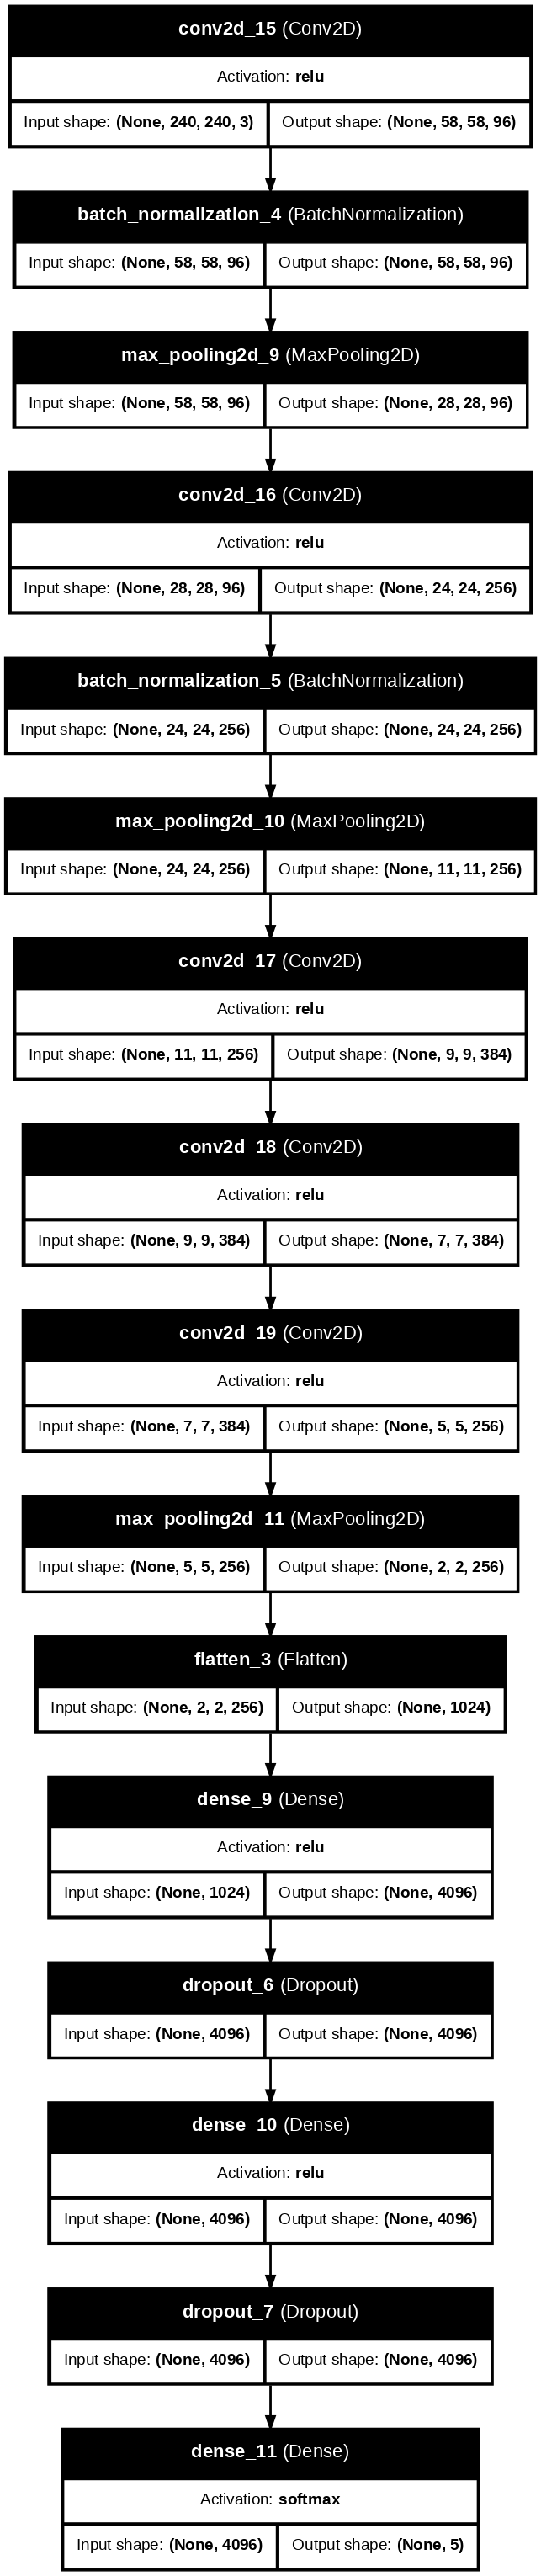

In [ ]:
tf.keras.utils.plot_model(
    alexnet,
    to_file='alex_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
alexnet.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import tensorflow as tf
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("Running on TPU:", tpu.master())
except ValueError:
    print("No TPU found")

No TPU found


In [ ]:
Alex_model = alexnet.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 43s 285ms/step - accuracy: 0.3149 - loss: 0.8049 - val_accuracy: 0.3204 - val_loss: 0.5864
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 31s 246ms/step - accuracy: 0.6810 - loss: 0.2877 - val_accuracy: 0.7587 - val_loss: 0.2395
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 33s 259ms/step - accuracy: 0.8376 - loss: 0.1640 - val_accuracy: 0.8582 - val_loss: 0.1430
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 250ms/step - accuracy: 0.8954 - loss: 0.1079 - val_accuracy: 0.9006 - val_loss: 0.1007
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 257ms/step - accuracy: 0.9345 - loss: 0.0741 - val_accuracy: 0.8766 - val_loss: 0.1235
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - accuracy: 0.9384 - loss: 0.0665 - val_accuracy: 0.8895 - val_loss: 0.1385
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 31s 247ms/step - accuracy: 0.9476 - loss: 0.0640 - val_accuracy: 0.9006 - val_loss: 0.1032
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 33s 258ms/step - accuracy: 0.9606 - loss: 0

In [ ]:
# prompt: vggnet structure (coding like alex net) with batchNormalization

def VGGNet(input_shape, num_classes):
      model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2), strides=(2, 2)),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2), strides=(2, 2)),
            layers.Conv2D(256, (3, 3), activation='relu'),
            layers.Conv2D(256, (3, 3), activation='relu'),
            layers.Conv2D(256, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2), strides=(2, 2)),
            layers.Conv2D(512, (3, 3), activation='relu'),
            layers.Conv2D(512, (3, 3), activation='relu'),
            layers.Conv2D(512, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2), strides=(2, 2)),
            layers.Conv2D(512, (3, 3), activation='relu'),
            layers.Conv2D(512, (3, 3), activation='relu'),
            layers.Conv2D(512, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2), strides=(2, 2)),
            layers.Flatten(),
            layers.Dense(4096, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(4096, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation='softmax')
        ]
    )
      return model


def VGGNet2():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 3, 1, activation='relu')(inp)
    x = layers.Conv2D(64, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG

# vggnet = VGGNet2()
# vggnet.summary()
# Example usage:
input_shape = (Img_height, Img_width, 3)  # Assuming color images
num_classes = 5  # Number of classes in your dataset
vggnet = VGGNet(input_shape, num_classes)
vggnet.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)                   │ (None, 238, 238, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 236, 236, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 236, 236, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 118, 118, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 116, 116, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 114, 114, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 114, 114, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 57, 57, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 55, 55, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 53, 53, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 51, 51, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 51, 51, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 23, 23, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 21, 21, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 19, 19, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 19, 19, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,623,621 (128.26 MB)

 Trainable params: 33,620,677 (128.25 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [ ]:
vggnet.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
vgg_model = vggnet.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.2552 - loss: 0.6572 - val_accuracy: 0.2081 - val_loss: 0.5330
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 121s 906ms/step - accuracy: 0.3870 - loss: 0.4407 - val_accuracy: 0.2210 - val_loss: 3.1963
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 114s 905ms/step - accuracy: 0.4912 - loss: 0.3885 - val_accuracy: 0.2891 - val_loss: 1.9381
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 114s 903ms/step - accuracy: 0.5888 - loss: 0.3357 - val_accuracy: 0.3591 - val_loss: 0.7369
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 117s 925ms/step - accuracy: 0.6460 - loss: 0.3038 - val_accuracy: 0.5654 - val_loss: 0.3830
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 140s 909ms/step - accuracy: 0.7765 - loss: 0.2056 - val_accuracy: 0.3978 - val_loss: 1.8952
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 114s 905ms/step - accuracy: 0.8289 - loss: 0.1687 - val_accuracy: 0.6169 - val_loss: 0.4071
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 116s 922ms/step - accuracy: 0.8536 - lo

In [ ]:
# prompt: LeNet structure

import tensorflow as tf
from tensorflow import keras

def lenet_model(input_shape, num_classes):
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(6, kernel_size=(5, 5), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(16, kernel_size=(5, 5), activation='relu', padding='valid'),
            layers.BatchNormalization(),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(120, activation='relu'),
            layers.Dense(84, activation='relu'),
            layers.Dense(num_classes, activation='softmax')
        ]
    )
    return model

# Example usage:
input_shape = (Img_height, Img_width, 3)  # Assuming color images
num_classes = 5  # Number of classes in your dataset
lenet = lenet_model(input_shape, num_classes)
lenet.summary()

lenet.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

lenet_model = lenet.fit(trainDataset, epochs=5, validation_data=valDataset)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_71 (Conv2D)                   │ (None, 240, 240, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 240, 240, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 120, 120, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 116, 116, 16)        │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 116, 116, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 58, 58, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 53824)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 120)                 │       6,459,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 5)                   │             425 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,472,549 (24.69 MB)

 Trainable params: 6,472,505 (24.69 MB)

 Non-trainable params: 44 (176.00 B)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 40s 287ms/step - accuracy: 0.6535 - loss: 0.8257 - val_accuracy: 0.4972 - val_loss: 0.4607
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 31s 247ms/step - accuracy: 0.9772 - loss: 0.0430 - val_accuracy: 0.6372 - val_loss: 0.3781
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 257ms/step - accuracy: 0.9910 - loss: 0.0152 - val_accuracy: 0.8766 - val_loss: 0.1823
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 31s 247ms/step - accuracy: 0.9958 - loss: 0.0098 - val_accuracy: 0.9742 - val_loss: 0.0421
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 256ms/step - accuracy: 0.9976 - loss: 0.0036 - val_accuracy: 0.9871 - val_loss: 0.0216


In [ ]:
# prompt: GoogLeNet structure with BatchNormalization

import tensorflow as tf
from tensorflow import keras

def Inception_block(input_tensor, filters):
    # 1x1 convolution
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(input_tensor)
    path1 = layers.BatchNormalization()(path1)

    # 1x1 convolution followed by 3x3 convolution
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(input_tensor)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)
    path2 = layers.BatchNormalization()(path2)

    # 1x1 convolution followed by 5x5 convolution
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(input_tensor)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)
    path3 = layers.BatchNormalization()(path3)

    # 3x3 max pooling followed by 1x1 convolution
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)
    path4 = layers.BatchNormalization()(path4)

    # Concatenate the outputs of the four paths
    output_tensor = layers.concatenate([path1, path2, path3, path4], axis=-1)
    return output_tensor


def GoogLeNet(input_shape, num_classes):
    input_tensor = keras.Input(shape=input_shape)

    # Initial Convolutional Layer
    x = layers.Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)

    # Inception Blocks
    x = Inception_block(x, [64, 96, 128, 16, 32, 32])
    x = Inception_block(x, [128, 128, 192, 32, 96, 64])
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)
    x = Inception_block(x, [192, 96, 208, 16, 48, 64])
    # ... add more Inception blocks as needed ...

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully Connected Layer
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_tensor, outputs=x)
    return model

# Example usage:
input_shape = (Img_height, Img_width, 3)  # Assuming color images
num_classes = 5  # Number of classes in your dataset
googlenet = GoogLeNet(input_shape, num_classes)
googlenet.summary()

googlenet.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
googlenet_model = googlenet.fit(trainDataset, epochs=5, validation_data=valDataset)


Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 240, 240, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_149 (Conv2D)       │ (None, 120, 120, 64)   │          9,472 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_42    │ (None, 120, 120, 64)   │            256 │ conv2d_149[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_49          │ (None, 60, 60, 64)     │              0 │ batch_normalization_4… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_151 (Conv2D)       │ (None, 60, 60, 96)     │          6,240 │ max_pooling2d_49[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_153 (Conv2D)       │ (None, 60, 60, 16)     │          1,040 │ max_pooling2d_49[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_50          │ (None, 60, 60, 64)     │              0 │ max_pooling2d_49[0][0] │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_150 (Conv2D)       │ (None, 60, 60, 64)     │          4,160 │ max_pooling2d_49[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_152 (Conv2D)       │ (None, 60, 60, 128)    │        110,720 │ conv2d_151[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_154 (Conv2D)       │ (None, 60, 60, 32)     │         12,832 │ conv2d_153[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_155 (Conv2D)       │ (None, 60, 60, 32)     │          2,080 │ max_pooling2d_50[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_43    │ (None, 60, 60, 64)     │            256 │ conv2d_150[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_44    │ (None, 60, 60, 128)    │            512 │ conv2d_152[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_45    │ (None, 60, 60, 32)     │            128 │ conv2d_154[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_46    │ (None, 60, 60, 32)     │            128 │ conv2d_155[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_12       

 Total params: 919,269 (3.51 MB)

 Trainable params: 916,645 (3.50 MB)

 Non-trainable params: 2,624 (10.25 KB)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 104s 664ms/step - accuracy: 0.5036 - loss: 0.5127 - val_accuracy: 0.2026 - val_loss: 0.7501
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - accuracy: 0.9110 - loss: 0.1345 - val_accuracy: 0.3407 - val_loss: 0.9791
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 40s 313ms/step - accuracy: 0.9744 - loss: 0.0527 - val_accuracy: 0.3352 - val_loss: 0.9815
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 41s 314ms/step - accuracy: 0.9859 - loss: 0.0285 - val_accuracy: 0.4254 - val_loss: 0.7053
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 40s 315ms/step - accuracy: 0.9934 - loss: 0.0165 - val_accuracy: 0.6556 - val_loss: 0.5684


In [ ]:
# prompt: EfficientNet structure with BatchNormalization

import tensorflow as tf
from tensorflow import keras

def EfficientNetBlock(input_tensor, num_filters, expand_ratio, strides=1):
    # Expansion Phase
    expanded_filters = int(num_filters * expand_ratio)
    x = layers.Conv2D(expanded_filters, 1, padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x) # EfficientNet uses Swish activation

    # Depthwise Convolution
    x = layers.DepthwiseConv2D(3, strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)

    # Squeeze and Excitation (SE) block (optional, but improves performance)
    # ... (Add SE block code here if needed)

    # Projection Phase
    x = layers.Conv2D(num_filters, 1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Residual Connection
    if strides == 1 and input_tensor.shape[-1] == num_filters:
        x = layers.add([x, input_tensor])

    return x

def EfficientNet(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Initial Convolution
    x = layers.Conv2D(32, 3, strides=2, padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)

    # EfficientNet Blocks (example configuration, adjust as needed)
    x = EfficientNetBlock(x, 16, 1)
    x = EfficientNetBlock(x, 24, 6, strides=2)
    x = EfficientNetBlock(x, 40, 6, strides=2)
    # ... Add more EfficientNet blocks

    # Classification Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1280, activation='swish')(x) # Bottleneck layer
    x = layers.Dropout(0.2)(x)  # Dropout for regularization
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


# Example usage:
input_shape = (Img_height, Img_width, 3)  # Assuming color images
num_classes = 5  # Number of classes in your dataset
efficientnet = EfficientNet(input_shape, num_classes)
efficientnet.summary()

efficientnet.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
efficientnet_model = efficientnet.fit(trainDataset, epochs=5, validation_data=valDataset)


Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_168 (Conv2D)                  │ (None, 120, 120, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_55               │ (None, 120, 120, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_169 (Conv2D)                  │ (None, 120, 120, 16)        │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_56               │ (None, 120, 120, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 120, 120, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d (DepthwiseConv2D)   │ (None, 120, 120, 16)        │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 120, 120, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 120, 120, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_170 (Conv2D)                  │ (None, 120, 120, 16)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 120, 120, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_171 (Conv2D)                  │ (None, 120, 120, 144)       │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 120, 120, 144)       │             576 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 120, 120, 144)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_1 (DepthwiseConv2D) │ (None, 60, 60, 144)         │           1,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_60               │ (None, 60, 60, 144)         │             576 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 60, 60, 144)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 88,885 (347.21 KB)

 Trainable params: 87,061 (340.08 KB)

 Non-trainable params: 1,824 (7.12 KB)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 66s 381ms/step - accuracy: 0.3268 - loss: 0.5555 - val_accuracy: 0.1915 - val_loss: 0.5922
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 56s 263ms/step - accuracy: 0.6290 - loss: 0.3472 - val_accuracy: 0.1915 - val_loss: 0.7504
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.8017 - loss: 0.2223 - val_accuracy: 0.2394 - val_loss: 0.7318
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 33s 265ms/step - accuracy: 0.8811 - loss: 0.1486 - val_accuracy: 0.3112 - val_loss: 0.6896
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 34s 266ms/step - accuracy: 0.9258 - loss: 0.1008 - val_accuracy: 0.5635 - val_loss: 0.5302


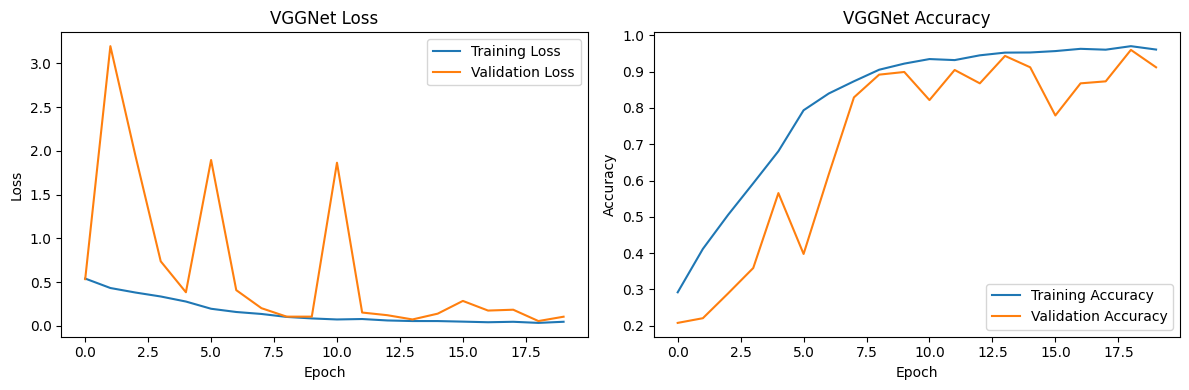

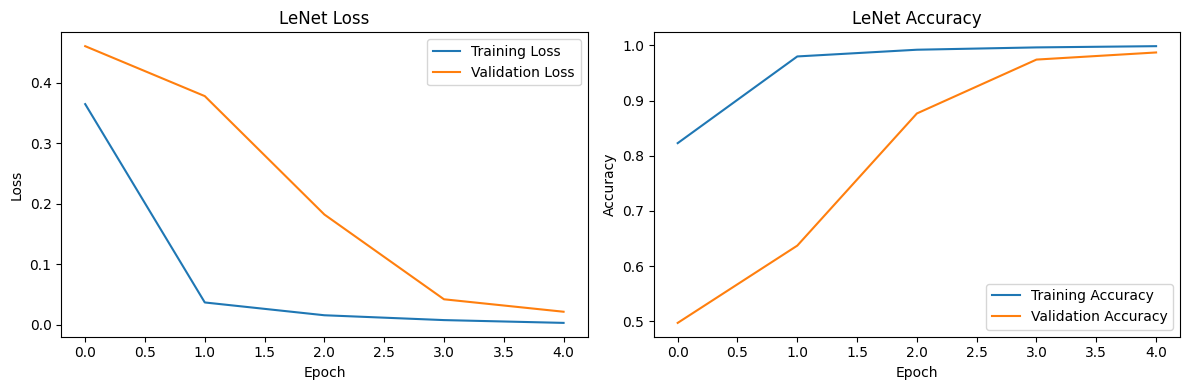

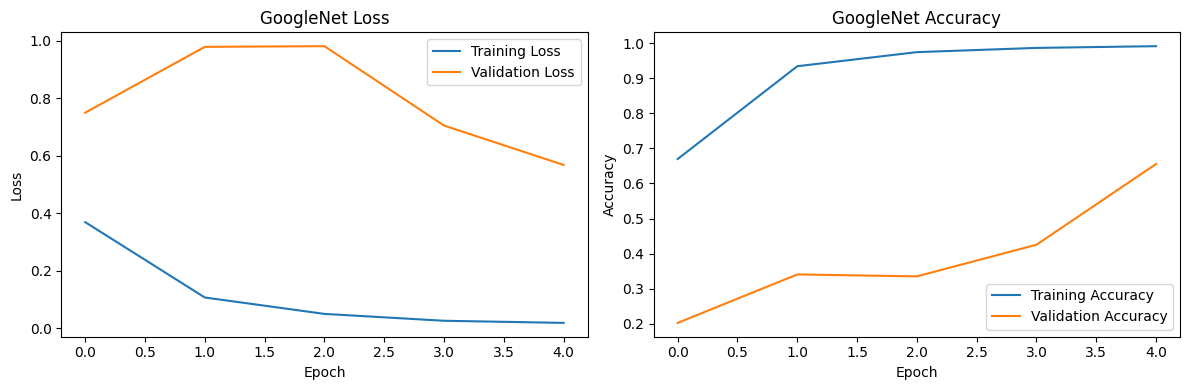

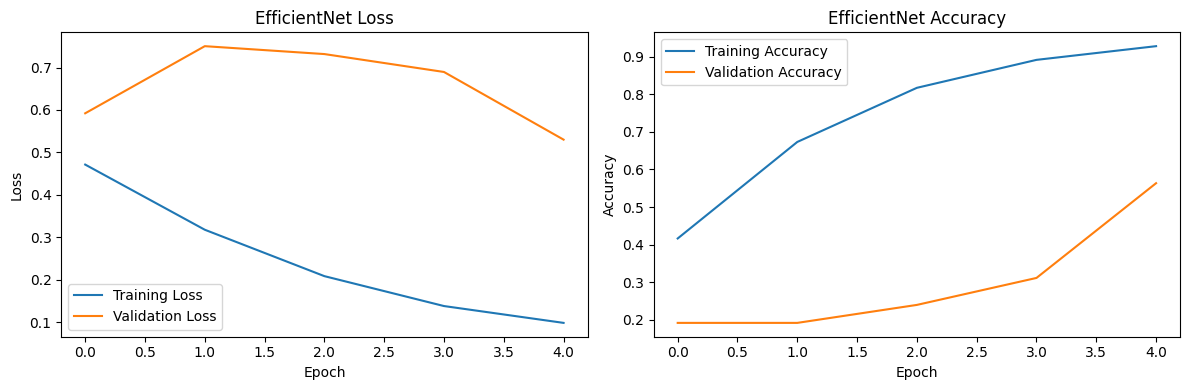

In [ ]:
# prompt: epochs lost and accuracy chart for all structures (models)

import matplotlib.pyplot as plt

# Assuming Alex_model, vgg_model, lenet_model, googlenet_model, and efficientnet_model are your training history objects

def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# plot_training_history(Alex_model, 'AlexNet')
plot_training_history(vgg_model, 'VGGNet')
plot_training_history(lenet_model, 'LeNet')
plot_training_history(googlenet_model, 'GoogleNet')
plot_training_history(efficientnet_model, 'EfficientNet')
